In [51]:
#load in csv files as dataframes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import re

#load in csv files as dataframes
Tournament_df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Data Collection/PokeAPI/Combined_Teams_2024.csv')
Moves_df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Data Collection/PokeAPI/moves.csv')
Pokemon_df = pd.read_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Data Collection/PokeAPI/pokemon.csv')

In [52]:
Pokemon_df
#add in an id column to the pokemon dataframe
Pokemon_df['id'] = Pokemon_df.index + 1
#add in the generation of the pokemon to the dataframe. For pokmeon 1-151, the generation is 1, for 152-251, the generation is 2, for 252-386, the generation is 3, for 387-493, the generation is 4, for 494-649, the generation is 5, for 650-721, the generation is 6, for 722-809, the generation is 7, for 810-905, the generation is 8 and for 905-1025, the generation is 9
Pokemon_df['generation'] = np.where(Pokemon_df['id'] <= 151, 1, np.where(Pokemon_df['id'] <= 251, 2, np.where(Pokemon_df['id'] <= 386, 3, np.where(Pokemon_df['id'] <= 493, 4, np.where(Pokemon_df['id'] <= 649, 5, np.where(Pokemon_df['id'] <= 721, 6, np.where(Pokemon_df['id'] <= 809, 7, np.where(Pokemon_df['id'] <= 905, 8, 9))))))))
Pokemon_df['pokemon'] = Pokemon_df['pokemon'].str.strip().str.lower()
# create a new column titled stat_total that is the sum of the base stats of each pokemon
Pokemon_df['stat_total'] = Pokemon_df['hp'] + Pokemon_df['attack'] + Pokemon_df['defense'] + Pokemon_df['special_attack'] + Pokemon_df['special_defense'] + Pokemon_df['speed']
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('urshifu'), 'urshifu', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('ogerpon'), 'ogerpon', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('landorus'), 'landorus', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('indeedee'), 'indeedee', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('tornadus'), 'tornadus', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('basculegion'), 'basculegion', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('enamorus'), 'enamorus', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('thundurus'), 'thundurus', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('lycanroc'), 'lycanroc', Pokemon_df['pokemon'])
Pokemon_df['pokemon'] = np.where(Pokemon_df['pokemon'].str.contains('mimikyu'), 'mimikyu', Pokemon_df['pokemon'])

#change urshifu type_two to water
Pokemon_df['type_two'] = np.where(Pokemon_df['pokemon'].str.contains('urshifu'), 'water', Pokemon_df['type_two'])
#create a new column that is type_one + type_two if type_two is null, then just type_one
Pokemon_df['type'] = np.where(Pokemon_df['type_two'].isnull(), Pokemon_df['type_one'], Pokemon_df['type_one'] + '-' + Pokemon_df['type_two'])

Pokemon_df

,pokemon,ability_one,ability_two,ability_three,height,weight,moves,num_moves,hp,attack,defense,special_attack,special_defense,speed,type_one,type_two,id,generation,stat_total,type
0,bulbasaur,overgrow,chlorophyll,NaN,7,69,"['razor-wind', 'swords-dance', 'cut', 'bind', ...",86,45,49,49,65,65,45,grass,poison,1,1,318,grass-poison
1,ivysaur,overgrow,chlorophyll,NaN,10,130,"['swords-dance', 'cut', 'bind', 'vine-whip', '...",83,60,62,63,80,80,60,grass,poison,2,1,405,grass-poison
2,venusaur,overgrow,chlorophyll,NaN,20,1000,"['swords-dance', 'cut', 'bind', 'vine-whip', '...",96,80,82,83,100,100,80,grass,poison,3,1,525,grass-poison
3,charmander,blaze,solar-power,NaN,6,85,"['mega-punch', 'fire-punch', 'thunder-punch', ...",105,39,52,43,60,50,65,fire,NaN,4,1,309,fire
4,charmeleon,blaze,solar-power,NaN,11,190,"['mega-punch', 'fire-punch', 'thunder-punch', ...",103,58,64,58,80,65,80,fire,NaN,5,1,405,fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,raging-bolt,protosynthesis,NaN,NaN,52,4800,"['stomp', 'body-slam', 'take-down', 'double-ed...",55,125,73,91,137,89,75,electric,dragon,1021,9,590,electric-dragon
1021,iron-boulder,quark-drive,NaN,NaN,15,1625,"['swords-dance', 'horn-attack', 'body-slam', '...",49,90,120,80,68,108,124,rock,psychic,1022,9,590,rock-psychic
1022,iron-crown,quark-drive,NaN,NaN,16,1560,"['swords-dance', 'body-slam', 'take-down', 'do...",49,90,72,100,122,108,98,steel,psychic,1023,9,590,steel-psychic
1023,terapagos,tera-shift,NaN,NaN,2,65,"['headbutt', 'body-slam', 'take-down', 'double...",59,90,65,85,65,85,60,normal,NaN,1024,9,450,normal


In [53]:
#In the moves dataframe, for moves with NaN accuracy, set the accuracy to 100
Moves_df['accuracy'] = Moves_df['accuracy'].fillna(100)

#changing the names of moves to match tournament data
Moves_df['name'] = np.where(Moves_df['name'].str.contains('u-turn'), 'uturn', Moves_df['name'])
Moves_df['name'] = np.where(Moves_df['name'].str.contains('freeze-dry'), 'freezedry', Moves_df['name'])
Moves_df['name'] = np.where(Moves_df['name'].str.contains('will-o-wisp'), 'willowisp', Moves_df['name'])

#in the generation column, remove the word generation and the - from the string
Moves_df['generation'] = Moves_df['generation'].str.replace('generation', '')
Moves_df['generation'] = Moves_df['generation'].str.replace('-', '')
#in the generation column, replace the roman numeral with the corresponding number
Moves_df['generation'] = Moves_df['generation'].replace('i', 1)
Moves_df['generation'] = Moves_df['generation'].replace('ii', 2)
Moves_df['generation'] = Moves_df['generation'].replace('iii', 3)
Moves_df['generation'] = Moves_df['generation'].replace('iv', 4)
Moves_df['generation'] = Moves_df['generation'].replace('v', 5)
Moves_df['generation'] = Moves_df['generation'].replace('vi', 6)
Moves_df['generation'] = Moves_df['generation'].replace('vii', 7)
Moves_df['generation'] = Moves_df['generation'].replace('viii', 8)
Moves_df['generation'] = Moves_df['generation'].replace('ix', 9)

In [54]:
# for each column make the first letter in each element lowercase
Tournament_df.columns = Tournament_df.columns.str.lower()
#for each column make the first letter in each row lowercase
Tournament_df['pokemon'] = Tournament_df['pokemon'].str.lower()
Tournament_df['item'] = Tournament_df['item'].str.lower()
Tournament_df['ability'] = Tournament_df['ability'].str.lower()
Tournament_df['tera type'] = Tournament_df['tera type'].str.lower()
Tournament_df['move 1'] = Tournament_df['move 1'].str.lower()
Tournament_df['move 2'] = Tournament_df['move 2'].str.lower()
Tournament_df['move 3'] = Tournament_df['move 3'].str.lower()
Tournament_df['move 4'] = Tournament_df['move 4'].str.lower()
Tournament_df['tournament'] = Tournament_df['tournament'].str.lower()


#if a cell in the pokemon column contains urshifu, change the cell to urshifu 
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('urshifu'), 'urshifu', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('ogerpon'), 'ogerpon', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('indeedee'), 'indeedee', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('calyrex'), 'calyrex', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('chienpao'), 'chien-pao', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('chiyu'), 'chi-yu', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('tatsugiri'), 'tatsugiri', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('weezinggalar'), 'weezing', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('ursaluna'), 'ursaluna', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('tinglu'), 'ting-lu', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('mausholdfour'), 'maushold', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('wochien'), 'wo-chien', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('arcaninehisui'), 'arcanine', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('landorustherian'), 'landorus', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('sinistchamasterpiece'), 'sinistcha', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('ninetalesalola'), 'ninetales', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('moltresgalar'), 'moltres', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('lilliganthisui'), 'lilligant', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('rotomwash'), 'rotom', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('articunogalar'), 'articuno', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('zapdosgalar'), 'zapdos', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('kommoo'), 'kommo-o', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('enamorustherian'), 'enamorus', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('zoroarkhisui'), 'zoroark', Tournament_df['pokemon'])
Tournament_df['pokemon'] = np.where(Tournament_df['pokemon'].str.contains('necrozmadawnwings'), 'necrozma', Tournament_df['pokemon'])



# Bringing over the generation of the pokemon to the tournament dataframe
Tournament_df['pokemon'] = Tournament_df['pokemon'].apply(lambda x: re.search(r'\((.*?)\)', x).group(1) if pd.notnull(x) and '(' in x and ')' in x else x)




Tournament_df['pokemon'] = Tournament_df['pokemon'].str.strip().str.lower()
#update the tournament df that if there is a space between two letters in the pokemon name, remove the space
Tournament_df['pokemon'] = Tournament_df['pokemon'].str.replace(' ', '-')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'generation']], on='pokemon', how='left')

#on the tera type column, remove any spaces
Tournament_df['tera type'] = Tournament_df['tera type'].str.replace(' ', '')

#on the move 1, move 2, move 3, and move 4 columns, remove any spaces at the start and end of the string
Tournament_df['move 1'] = Tournament_df['move 1'].str.strip()
Tournament_df['move 2'] = Tournament_df['move 2'].str.strip()
Tournament_df['move 3'] = Tournament_df['move 3'].str.strip()
Tournament_df['move 4'] = Tournament_df['move 4'].str.strip()


#on the move 1, move 2, move 3, and move 4 columns, replace any spaces with a hyphen
Tournament_df['move 1'] = Tournament_df['move 1'].str.replace(' ', '-')
Tournament_df['move 2'] = Tournament_df['move 2'].str.replace(' ', '-')
Tournament_df['move 3'] = Tournament_df['move 3'].str.replace(' ', '-')
Tournament_df['move 4'] = Tournament_df['move 4'].str.replace(' ', '-')

#change the name of the move 1, move 2, move 3, and move 4 columns to move_1, move_2, move_3, and move_4
Tournament_df = Tournament_df.rename(columns={'move 1': 'move_1', 'move 2': 'move_2', 'move 3': 'move_3', 'move 4': 'move_4'})

#adding the type_one, type_two, stat_total, hp, attack, defense, special_attack, special_defense, speed, and type columns to the tournament dataframe
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'type_one']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'type_two']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'stat_total']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'hp']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'attack']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'defense']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'special_attack']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'special_defense']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'speed']], on='pokemon', how='left')
Tournament_df = Tournament_df.merge(Pokemon_df[['pokemon', 'type']], on='pokemon', how='left')
#adding the move 1 power, effect, and effect_chance, accuracy and generation columns to the tournament dataframe
Tournament_df = Tournament_df.merge(Moves_df[['name', 'power']], left_on='move_1', right_on='name', how='left')
Tournament_df.rename(columns={'power': 'move_1_power'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'effect']], left_on='move_1', right_on='name', how='left')
Tournament_df.rename(columns={'effect': 'move_1_effect'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'effect_chance']], left_on='move_1', right_on='name', how='left')
Tournament_df.rename(columns={'effect_chance': 'move_1_effect_chance'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'accuracy']], left_on='move_1', right_on='name', how='left')
Tournament_df.rename(columns={'accuracy': 'move_1_accuracy'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'generation']], left_on='move_1', right_on='name', how='left')
Tournament_df.rename(columns={'generation': 'move_1_generation'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)



#adding the move 2 power, effect, and effect_chance columns to the tournament dataframe
Tournament_df = Tournament_df.merge(Moves_df[['name', 'power']], left_on='move_2', right_on='name', how='left')
Tournament_df.rename(columns={'power': 'move_2_power'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)


Tournament_df = Tournament_df.merge(Moves_df[['name', 'effect']], left_on='move_2', right_on='name', how='left')
Tournament_df.rename(columns={'effect': 'move_2_effect'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'effect_chance']], left_on='move_2', right_on='name', how='left')
Tournament_df.rename(columns={'effect_chance': 'move_2_effect_chance'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'accuracy']], left_on='move_2', right_on='name', how='left')
Tournament_df.rename(columns={'accuracy': 'move_2_accuracy'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'generation']], left_on='move_2', right_on='name', how='left')
Tournament_df.rename(columns={'generation': 'move_2_generation'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

#adding the move 3 power, effect, and effect_chance columns to the tournament dataframe
Tournament_df = Tournament_df.merge(Moves_df[['name', 'power']], left_on='move_3', right_on='name', how='left')
Tournament_df.rename(columns={'power': 'move_3_power'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'effect']], left_on='move_3', right_on='name', how='left')
Tournament_df.rename(columns={'effect': 'move_3_effect'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'effect_chance']], left_on='move_3', right_on='name', how='left')
Tournament_df.rename(columns={'effect_chance': 'move_3_effect_chance'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'accuracy']], left_on='move_3', right_on='name', how='left')
Tournament_df.rename(columns={'accuracy': 'move_3_accuracy'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'generation']], left_on='move_3', right_on='name', how='left')
Tournament_df.rename(columns={'generation': 'move_3_generation'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)


#adding the move 4 power, effect, and effect_chance columns to the tournament dataframe
Tournament_df = Tournament_df.merge(Moves_df[['name', 'power']], left_on='move_4', right_on='name', how='left')
Tournament_df.rename(columns={'power': 'move_4_power'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'effect']], left_on='move_4', right_on='name', how='left')
Tournament_df.rename(columns={'effect': 'move_4_effect'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'effect_chance']], left_on='move_4', right_on='name', how='left')
Tournament_df.rename(columns={'effect_chance': 'move_4_effect_chance'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'accuracy']], left_on='move_4', right_on='name', how='left')
Tournament_df.rename(columns={'accuracy': 'move_4_accuracy'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

Tournament_df = Tournament_df.merge(Moves_df[['name', 'generation']], left_on='move_4', right_on='name', how='left')
Tournament_df.rename(columns={'generation': 'move_4_generation'}, inplace=True)
Tournament_df.drop(columns=['name'], inplace=True)

#change the name of generation_y to move_1_generation
Tournament_df.rename(columns={'generation_y': 'move_1_generation'}, inplace=True)

#change the name of generation_x to pokemon_generation
Tournament_df.rename(columns={'generation_x': 'pokemon_generation'}, inplace=True)

#save the dataframe to a csv file
Tournament_df.to_csv('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Data Collection/PokeAPI/Combined_Teams_2024_Updated.csv', index=False)

Tournament_df






,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,wins,...,move_3_power,move_3_effect,move_3_effect_chance,move_3_accuracy,move_3_generation,move_4_power,move_4_effect,move_4_effect_chance,move_4_accuracy,move_4_generation
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1,9,...,80.0,Inflicts regular damage.,NaN,100.0,6.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,5.0
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1,9,...,120.0,Inflicts regular damage. User takes 1/3 the d...,NaN,100.0,4.0,NaN,"Until the end of this turn, any moves that opp...",NaN,100.0,3.0
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1,9,...,120.0,"Inflicts regular damage, then lowers the user'...",100.0,100.0,4.0,40.0,Inflicts regular damage.,NaN,100.0,4.0
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1,9,...,40.0,Inflicts regular damage. Causes the target to...,100.0,100.0,3.0,NaN,Inflicts regular damage. Power increases with...,NaN,100.0,1.0
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1,9,...,NaN,Erects a barrier around the user's side of the...,NaN,100.0,1.0,NaN,"For the next three turns, all Pokémon on the u...",NaN,100.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,pelipper,focus sash,drizzle,ghost,protect,wide-guard,hurricane,weather-ball,252,5,...,110.0,Inflicts regular damage. Has a 30% chance to ...,30.0,70.0,5.0,50.0,Inflicts regular damage. If a weather move is...,NaN,100.0,3.0
4448,gholdengo,life orb,good as gold,normal,protect,nasty-plot,make-it-rain,shadow-ball,252,5,...,120.0,NaN,NaN,100.0,9.0,80.0,Inflicts regular damage. Has a 20% chance to ...,20.0,100.0,2.0
4449,grimmsnarl,light clay,prankster,dark,reflect,light-screen,thunder-wave,foul-play,252,5,...,NaN,Paralyzes the target.,NaN,90.0,1.0,95.0,Inflicts regular damage. Damage is calculated...,NaN,100.0,5.0
4450,urshifu,choice scarf,unseen fist,grass,coaching,close-combat,surging-strikes,uturn,252,5,...,25.0,Inflicts regular damage.,NaN,100.0,8.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,4.0


In [55]:
#show the missing nan values in the move_1 accuracy column
Tournament_df[Tournament_df['move_4_accuracy'].isnull()]['move_4'].unique()

array([nan], dtype=object)

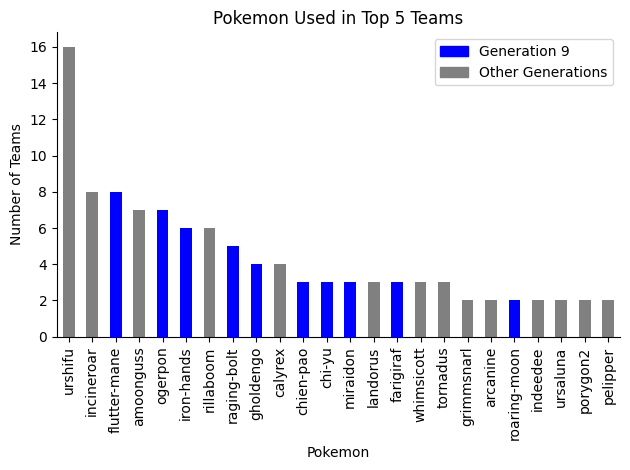

In [56]:
# Filter the top 5 ranked teams
Top5_df = Tournament_df.loc[Tournament_df['rank'] <= 5]

# Get pokemon used on more than 1 team
pokemon_counts = Top5_df['pokemon'].value_counts().loc[lambda x: x > 1]

# Check which pokemon belong to generation 9
is_gen_9 = pokemon_counts.index.isin(Top5_df[Top5_df['pokemon_generation'] == 9]['pokemon'])

# Plot the bar chart with color coding
pokemon_counts.plot(kind='bar', color=np.where(is_gen_9, 'blue', 'grey'))

# Create custom legend patches
legend_handles = [
    mpatches.Patch(color='blue', label='Generation 9'),
    mpatches.Patch(color='grey', label='Other Generations')
]

# Add the custom legend
plt.legend(handles=legend_handles, loc='upper right')

# Label axes and title
plt.xlabel('Pokemon')
plt.ylabel('Number of Teams')
plt.title('Pokemon Used in Top 5 Teams')

# Remove the box around the plot
sns.despine()
plt.tight_layout()  # Adjust the layout to prevent clipping
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Pokemon_Used_Top_5_Teams.png')


# Show the plot
plt.show()




In [57]:
# calculate the mean of the stat_total for the top 5 teams
Top_5_Average_Stat_Total = Top5_df['stat_total'].mean()

#calculate the mean of the stat_total for the rest of the teams excluding the top 5 teams
Remaining_Teams_Average_Stat_Total = Tournament_df.loc[~Tournament_df.index.isin(Top5_df.index), 'stat_total'].mean()

gen_stat_totals = Pokemon_df.groupby('generation')['stat_total'].quantile(0.9)



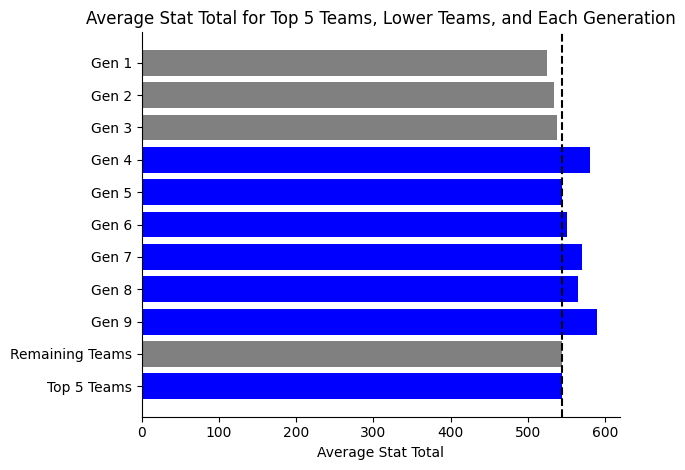

In [58]:
# on a horizontal bar chart, plot the Top_5_Average_Stat_Total, Remaining_Teams_Average_Stat_Total and gen_stat_totals
fig, ax = plt.subplots()
ax.barh(['Top 5 Teams', 'Remaining Teams', 'Gen 9', 'Gen 8', 'Gen 7', 'Gen 6', 'Gen 5', 'Gen 4', 'Gen 3', 'Gen 2', 'Gen 1'], [Top_5_Average_Stat_Total, Remaining_Teams_Average_Stat_Total, gen_stat_totals[9], gen_stat_totals[8], gen_stat_totals[7], gen_stat_totals[6], gen_stat_totals[5], gen_stat_totals[4], gen_stat_totals[3], gen_stat_totals[2], gen_stat_totals[1]], color=['blue', 'grey', 'blue', 'blue', 'blue', 'blue', 'Blue', 'blue', 'grey', 'grey', 'grey'])
plt.xlabel('Average Stat Total')
plt.title('Average Stat Total for Top 5 Teams, Lower Teams, and Each Generation')
#add a dotted line from top 5 teams upwards
plt.axvline(x=Top_5_Average_Stat_Total, color='black', linestyle='--')
plt.tight_layout()
sns.despine()
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Average_Stat_Total_Top_5_Teams.png', bbox_inches='tight')
plt.show()


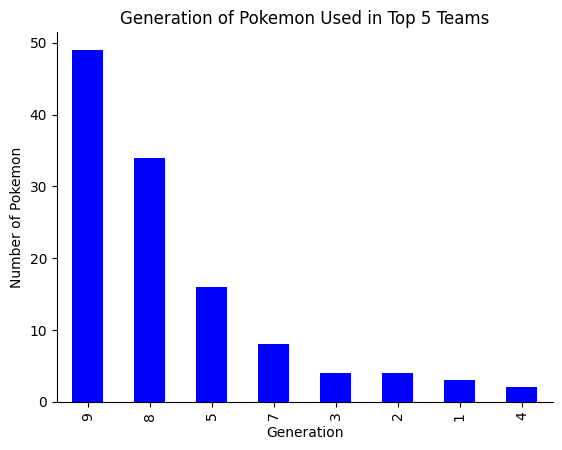

In [59]:
#show the distribution of the generations of pokemon used in the top 5 teams
Top5_df['pokemon_generation'].value_counts().plot(kind='bar', color = 'blue')
plt.title('Generation of Pokemon Used in Top 5 Teams')
plt.xlabel('Generation')
plt.ylabel('Number of Pokemon')
#remove the box around the plot
sns.despine()
plt.show()


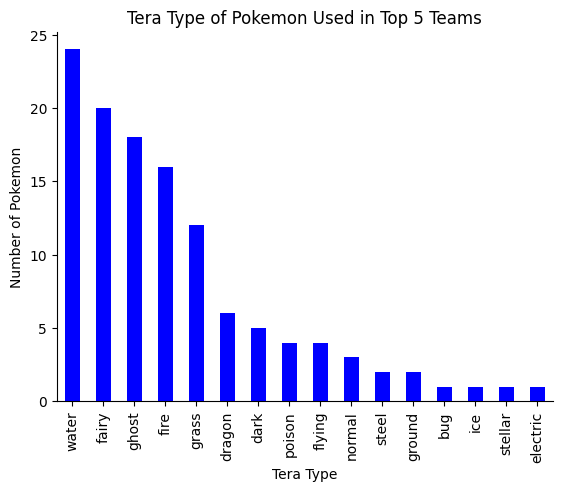

In [60]:
#show the distribution of pokemon types used in the top 5 teams
Top5_df['tera type'].value_counts().plot(kind='bar', color = 'blue')
plt.title('Tera Type of Pokemon Used in Top 5 Teams')
plt.xlabel('Tera Type')
plt.ylabel('Number of Pokemon')
#remove the box around the plot
sns.despine()
plt.show()



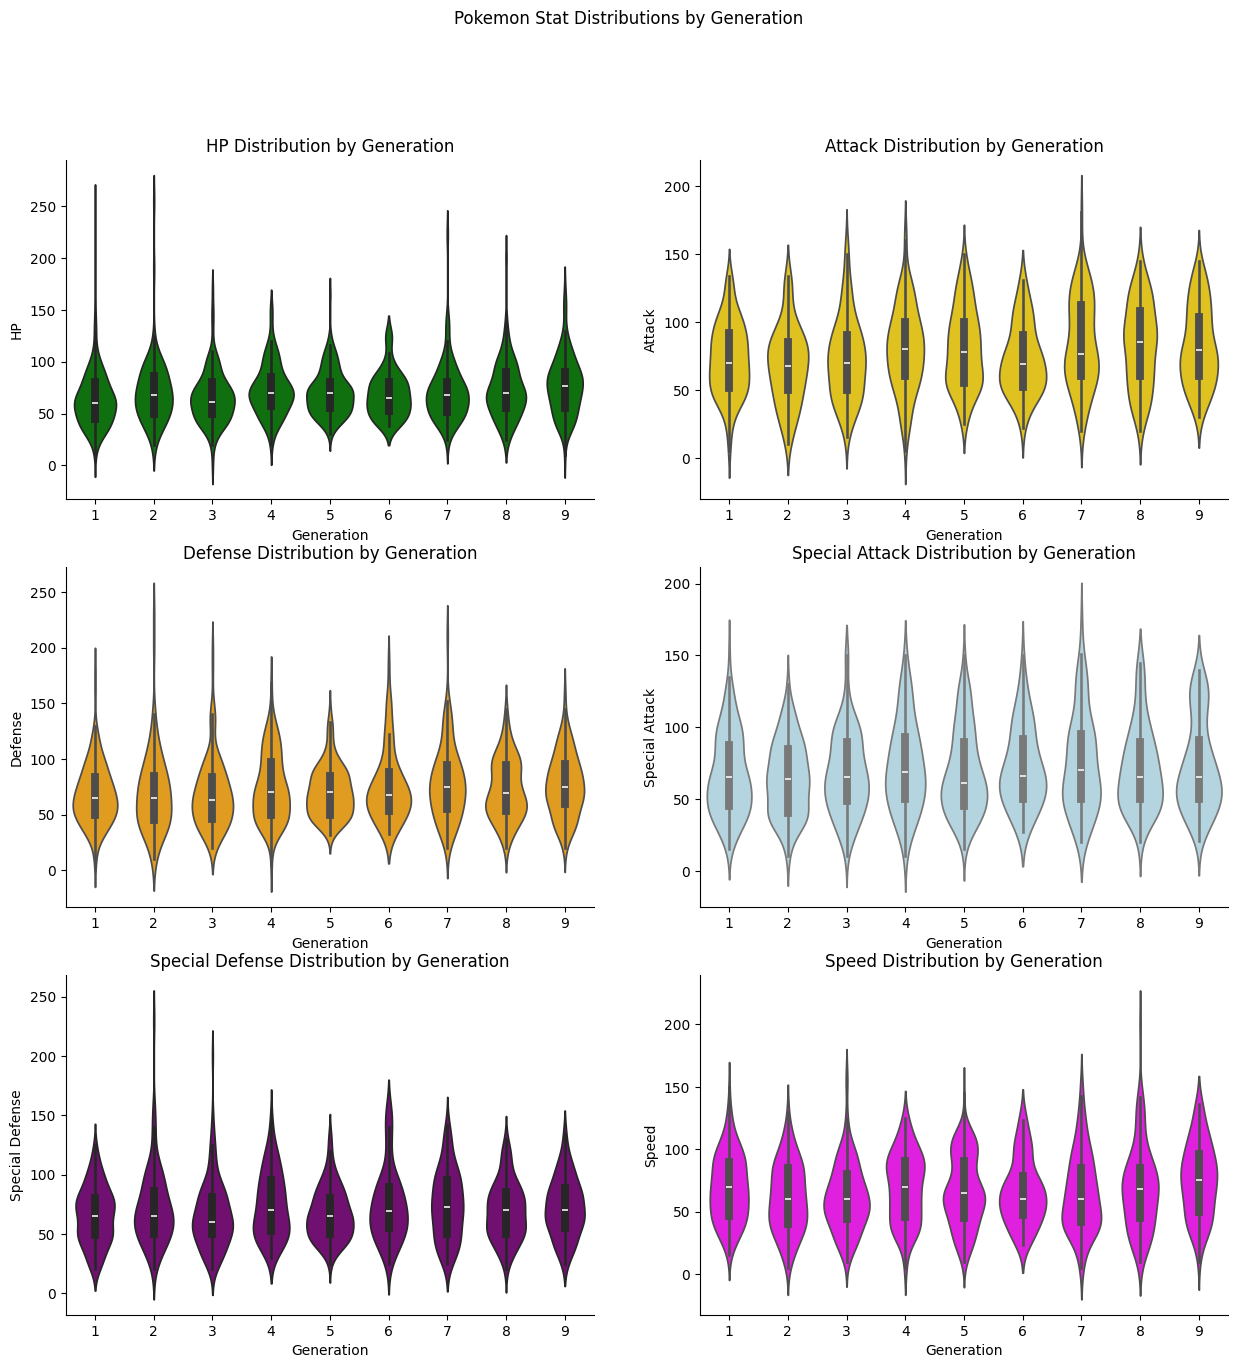

In [61]:
#plot these six violin plots in one figure with a title for each plot
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Pokemon Stat Distributions by Generation')
sns.violinplot(x='generation', y='hp', data=Pokemon_df, color='Green', ax=axs[0, 0])
axs[0, 0].set_title('HP Distribution by Generation')
axs[0, 0].set(xlabel='Generation', ylabel='HP')
#remove the box around the plot
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='attack', data=Pokemon_df, color='gold', ax=axs[0, 1])
axs[0, 1].set_title('Attack Distribution by Generation')
axs[0, 1].set(xlabel='Generation', ylabel='Attack')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='defense', data=Pokemon_df, color='orange', ax=axs[1, 0])
axs[1, 0].set_title('Defense Distribution by Generation')
axs[1, 0].set(xlabel='Generation', ylabel='Defense')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='special_attack', data=Pokemon_df, color = 'lightblue', ax=axs[1, 1])
axs[1, 1].set_title('Special Attack Distribution by Generation')
axs[1, 1].set(xlabel='Generation', ylabel='Special Attack')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='special_defense', data=Pokemon_df, color='purple', ax=axs[2, 0])
axs[2, 0].set_title('Special Defense Distribution by Generation')
axs[2, 0].set(xlabel='Generation', ylabel='Special Defense')
axs[2, 0].spines['top'].set_visible(False)
axs[2, 0].spines['right'].set_visible(False)
sns.violinplot(x='generation', y='speed', data=Pokemon_df, color='magenta', ax=axs[2, 1])
axs[2, 1].set_title('Speed Distribution by Generation')
axs[2, 1].set(xlabel='Generation', ylabel='Speed')
axs[2, 1].spines['top'].set_visible(False)
axs[2, 1].spines['right'].set_visible(False)
plt.show()

In [62]:
#calculate the median of hp, attack, defense, special attack, special defense and speed for each generation
mean_stats = Pokemon_df.groupby('generation')[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']].mean()
mean_stats


,hp,attack,defense,special_attack,special_defense,speed
generation,,,,,,
1,64.211921,72.913907,68.225166,67.139073,66.086093,69.066225
2,70.980000,68.260000,69.690000,64.500000,72.340000,61.410000
3,65.666667,73.111111,69.007407,67.859259,66.466667,61.614815
4,73.102804,80.214953,75.112150,73.280374,74.383178,69.476636
5,70.314103,81.032051,71.237179,69.243590,67.333333,66.596154
6,68.916667,72.500000,75.083333,72.541667,74.583333,65.680556
7,71.011364,84.772727,78.727273,74.954545,74.568182,65.375000
8,72.822917,82.906250,73.281250,71.645833,69.614583,68.947917
9,77.391667,82.425000,76.783333,72.866667,72.475000,75.450000


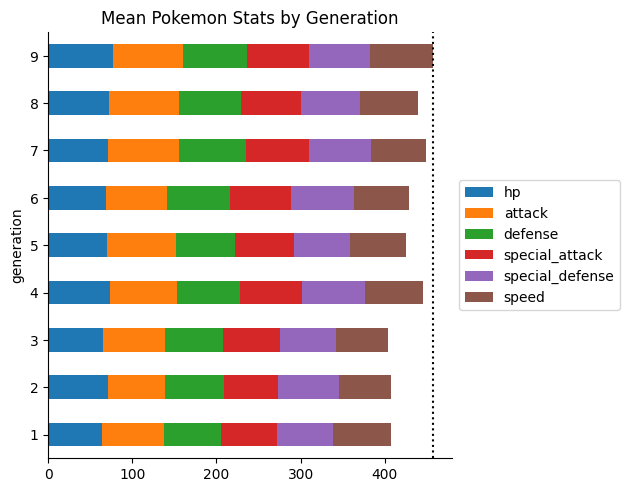

In [63]:
#change the plot to be a horizontal stacked bar chart
#plot the stacked bar chart
mean_stats.plot(kind='barh', stacked=True)
#move the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#remove the box around the plot
sns.despine()
plt.tight_layout()
plt.title('Mean Pokemon Stats by Generation')
#add in a dotted line at the end of generation 9 going down the plot
plt.axvline(x=mean_stats.loc[9].sum(), color='black', linestyle='dotted')
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Mean_Pokemon_Stats_by_Generation.png',bbox_inches='tight')


In [64]:
#create a new dataframe with that removes the bottom 20% of pokemon by stat total by generation and the top 20% of pokemon by stat total by generation
top25 = Pokemon_df.groupby('generation')['stat_total'].quantile(0.75)

top25 = top25.reset_index()
top25.columns = ['generation', 'top25']

#create a new dataframe with only the top 25% of pokemon by stat total by generation
top25_df = Pokemon_df.merge(top25, on='generation', how='left')
top25_df = top25_df[top25_df['stat_total'] >= top25_df['top25']]






In [65]:
#calculate the median of hp, attack, defense, special attack, special defense and speed for each generation
top25_mean_stats = top25_df.groupby('generation')[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']].mean()


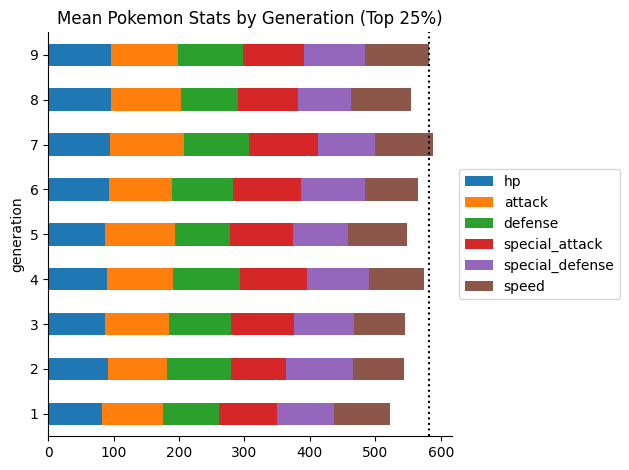

In [66]:
#Create a horizontal stacked bar chart of the median stats for each generation
top25_mean_stats.plot(kind='barh', stacked=True)
#move the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#remove the box around the plot
sns.despine()
plt.title('Mean Pokemon Stats by Generation (Top 25%)')
plt.tight_layout()
#add in a dotted line at the end of generation 9 going down the plot
plt.axvline(x=top25_mean_stats.loc[9].sum(), color='black', linestyle='dotted')
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Top25_Mean_Pokemon_Stats_by_Generation.png')
plt.show()


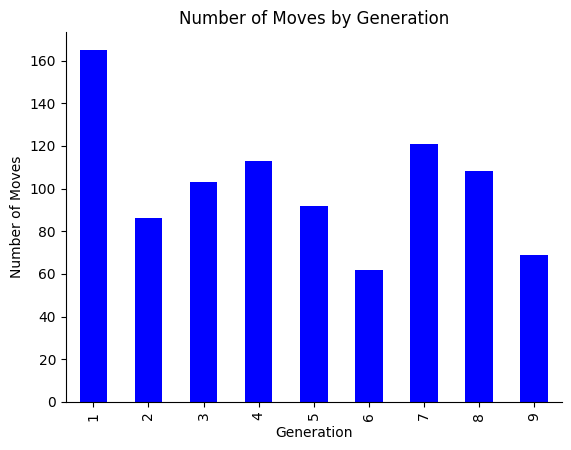

In [67]:
#for each generation, count the number of moves
generation_counts = Moves_df['generation'].value_counts()
generation_counts = generation_counts.sort_index()
generation_counts.plot(kind='bar', color='blue')
plt.title('Number of Moves by Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Moves')
#remove the box around the plot
sns.despine()
plt.show()


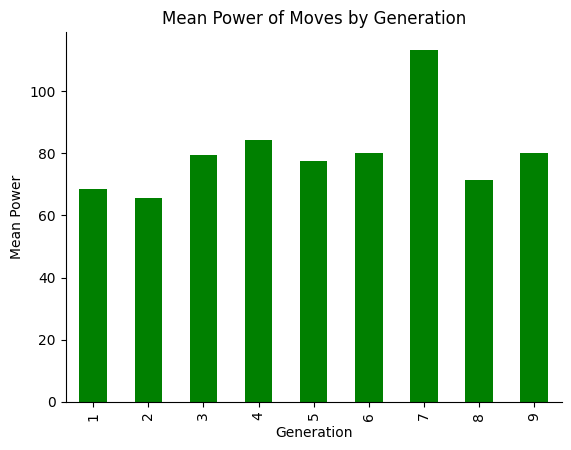

In [68]:
#for each generation, get the mean power of the moves filtered by moves that have a power greater than 0
generation_power = Moves_df[Moves_df['power'] > 0].groupby('generation')['power'].mean()
generation_power = generation_power.sort_index()
generation_power.plot(kind='bar', color='green')
plt.title('Mean Power of Moves by Generation')
plt.xlabel('Generation')
plt.ylabel('Mean Power')
#remove the box around the plot
sns.despine()
plt.show()



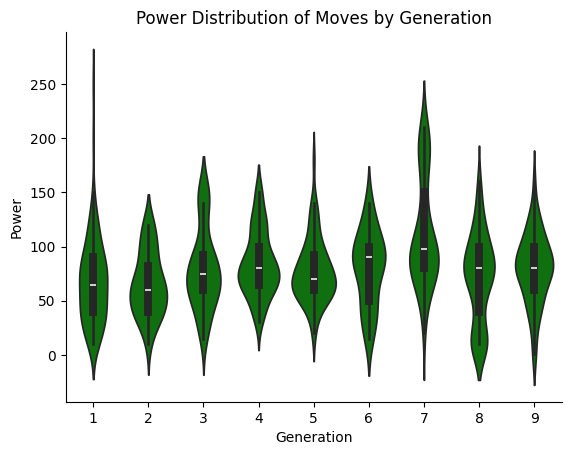

In [69]:
#show the distribution of the power of moves by generation
sns.violinplot(x='generation', y='power', data=Moves_df[Moves_df['power'] > 0], color='green')
plt.title('Power Distribution of Moves by Generation')
plt.xlabel('Generation')
plt.ylabel('Power')
#remove the box around the plot
sns.despine()
plt.show()


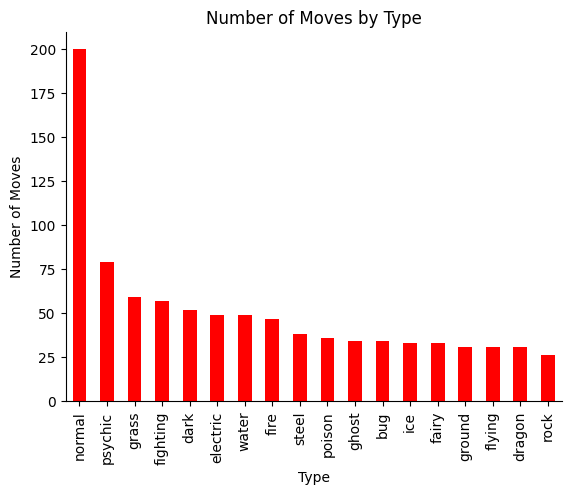

In [70]:
#moves by type
#count the number of moves by type
type_counts = Moves_df['type'].value_counts()
type_counts.plot(kind='bar', color='red')
plt.title('Number of Moves by Type')
plt.xlabel('Type')
plt.ylabel('Number of Moves')
#remove the box around the plot
sns.despine()
plt.show()


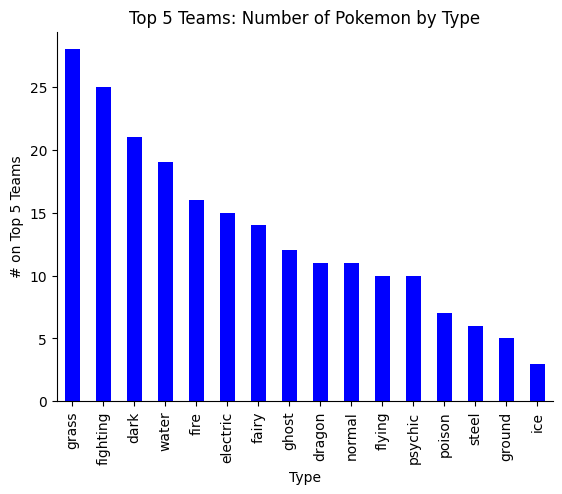

In [71]:
# for the top_5 teams, get the number of each type_1 and type_2 in ascending order
type_1_counts = Top5_df['type_one'].value_counts()
type_2_counts = Top5_df['type_two'].value_counts()
type_counts = type_1_counts.add(type_2_counts, fill_value=0)
#plotting
type_counts = type_counts.sort_values(ascending=False)
type_counts.plot(kind='bar', color='blue')
plt.title('Top 5 Teams: Number of Pokemon by Type')
plt.xlabel('Type')
plt.ylabel('# on Top 5 Teams')
#remove the box around the plot
sns.despine()
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Top_5_Teams_Number_of_Pokemon_by_Type.png', bbox_inches='tight')
plt.show()




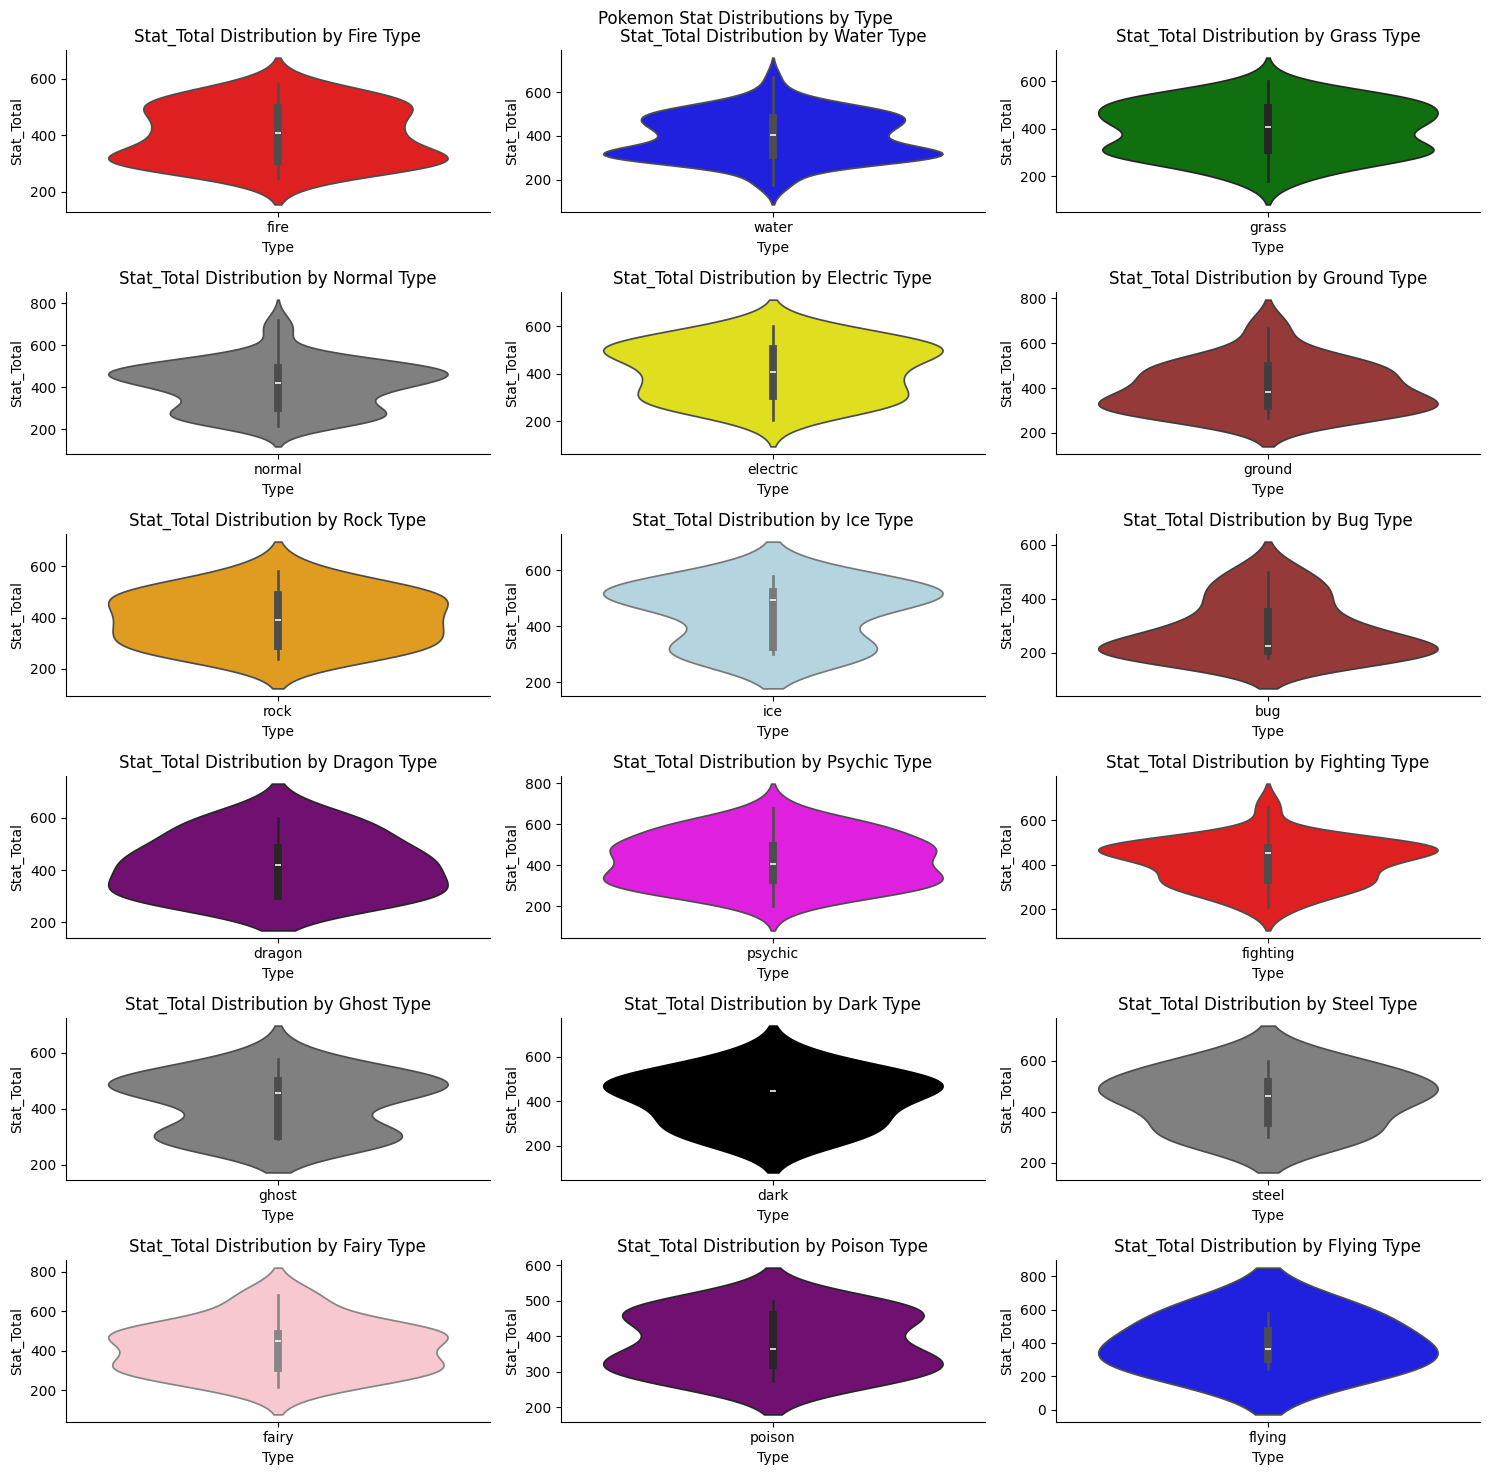

In [72]:
# for each the electric type plot the distribution of its stats_total
Fire_Pokemon = Pokemon_df[Pokemon_df['type'] == 'fire']
Water_Pokemon = Pokemon_df[Pokemon_df['type'] == 'water']
Grass_Pokemon = Pokemon_df[Pokemon_df['type'] == 'grass']
Normal_Pokemon = Pokemon_df[Pokemon_df['type'] == 'normal']
Electric_Pokemon = Pokemon_df[Pokemon_df['type'] == 'electric']
Ground_Pokemon = Pokemon_df[Pokemon_df['type'] == 'ground']
Rock_Pokemon = Pokemon_df[Pokemon_df['type'] == 'rock']
Ice_Pokemon = Pokemon_df[Pokemon_df['type'] == 'ice']
Bug_Pokemon = Pokemon_df[Pokemon_df['type'] == 'bug']
Dragon_Pokemon = Pokemon_df[Pokemon_df['type'] == 'dragon']
Psychic_Pokemon = Pokemon_df[Pokemon_df['type'] == 'psychic']
Fighting_Pokemon = Pokemon_df[Pokemon_df['type'] == 'fighting']
Ghost_Pokemon = Pokemon_df[Pokemon_df['type'] == 'ghost']
Dark_Pokemon = Pokemon_df[Pokemon_df['type'] == 'dark']
Steel_Pokemon = Pokemon_df[Pokemon_df['type'] == 'steel']
Fairy_Pokemon = Pokemon_df[Pokemon_df['type'] == 'fairy']
Poison_Pokemon = Pokemon_df[Pokemon_df['type'] == 'poison']
Flying_Pokemon = Pokemon_df[Pokemon_df['type'] == 'flying']

#plot the distribution of the stat_total of each type of pokemon
fig, axs = plt.subplots(6, 3, figsize=(15, 15))
fig.suptitle('Pokemon Stat Distributions by Type')
sns.violinplot(x='type', y='stat_total', data=Fire_Pokemon, color='red', ax=axs[0, 0])
axs[0, 0].set_title('Stat_Total Distribution by Fire Type')
axs[0, 0].set(xlabel='Type', ylabel='Stat_Total')
#remove the box around the plot
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Water_Pokemon, color='blue', ax=axs[0, 1])
axs[0, 1].set_title('Stat_Total Distribution by Water Type')
axs[0, 1].set(xlabel='Type', ylabel='Stat_Total')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Grass_Pokemon, color='green', ax=axs[0, 2])
axs[0, 2].set_title('Stat_Total Distribution by Grass Type')
axs[0, 2].set(xlabel='Type', ylabel='Stat_Total')
axs[0, 2].spines['top'].set_visible(False)
axs[0, 2].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Normal_Pokemon, color='grey', ax=axs[1, 0])
axs[1, 0].set_title('Stat_Total Distribution by Normal Type')
axs[1, 0].set(xlabel='Type', ylabel='Stat_Total')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Electric_Pokemon, color='yellow', ax=axs[1, 1])
axs[1, 1].set_title('Stat_Total Distribution by Electric Type')
axs[1, 1].set(xlabel='Type', ylabel='Stat_Total')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Ground_Pokemon, color='brown', ax=axs[1, 2])
axs[1, 2].set_title('Stat_Total Distribution by Ground Type')
axs[1, 2].set(xlabel='Type', ylabel='Stat_Total')
axs[1, 2].spines['top'].set_visible(False)
axs[1, 2].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Rock_Pokemon, color='orange', ax=axs[2, 0])
axs[2, 0].set_title('Stat_Total Distribution by Rock Type')
axs[2, 0].set(xlabel='Type', ylabel='Stat_Total')
axs[2, 0].spines['top'].set_visible(False)
axs[2, 0].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Ice_Pokemon, color='lightblue', ax=axs[2, 1])
axs[2, 1].set_title('Stat_Total Distribution by Ice Type')
axs[2, 1].set(xlabel='Type', ylabel='Stat_Total')
axs[2, 1].spines['top'].set_visible(False)
axs[2, 1].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Bug_Pokemon, color='brown', ax=axs[2, 2])
axs[2, 2].set_title('Stat_Total Distribution by Bug Type')
axs[2, 2].set(xlabel='Type', ylabel='Stat_Total')
axs[2, 2].spines['top'].set_visible(False)
axs[2, 2].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Dragon_Pokemon, color='purple', ax=axs[3, 0])
axs[3, 0].set_title('Stat_Total Distribution by Dragon Type')
axs[3, 0].set(xlabel='Type', ylabel='Stat_Total')
axs[3, 0].spines['top'].set_visible(False)
axs[3, 0].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Psychic_Pokemon, color='magenta', ax=axs[3, 1])
axs[3, 1].set_title('Stat_Total Distribution by Psychic Type')
axs[3, 1].set(xlabel='Type', ylabel='Stat_Total')
axs[3, 1].spines['top'].set_visible(False)
axs[3, 1].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Fighting_Pokemon, color='red', ax=axs[3, 2])
axs[3, 2].set_title('Stat_Total Distribution by Fighting Type')
axs[3, 2].set(xlabel='Type', ylabel='Stat_Total')
axs[3, 2].spines['top'].set_visible(False)
axs[3, 2].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Ghost_Pokemon, color='grey', ax=axs[4, 0])
axs[4, 0].set_title('Stat_Total Distribution by Ghost Type')
axs[4, 0].set(xlabel='Type', ylabel='Stat_Total')
axs[4, 0].spines['top'].set_visible(False)
axs[4, 0].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Dark_Pokemon, color='black', ax=axs[4, 1])
axs[4, 1].set_title('Stat_Total Distribution by Dark Type')
axs[4, 1].set(xlabel='Type', ylabel='Stat_Total')
axs[4, 1].spines['top'].set_visible(False)
axs[4, 1].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Steel_Pokemon, color='grey', ax=axs[4, 2])
axs[4, 2].set_title('Stat_Total Distribution by Steel Type')
axs[4, 2].set(xlabel='Type', ylabel='Stat_Total')
axs[4, 2].spines['top'].set_visible(False)
axs[4, 2].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Fairy_Pokemon, color='pink', ax=axs[5, 0])
axs[5, 0].set_title('Stat_Total Distribution by Fairy Type')
axs[5, 0].set(xlabel='Type', ylabel='Stat_Total')
axs[5, 0].spines['top'].set_visible(False)
axs[5, 0].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Poison_Pokemon, color='purple', ax=axs[5, 1])
axs[5, 1].set_title('Stat_Total Distribution by Poison Type')
axs[5, 1].set(xlabel='Type', ylabel='Stat_Total')
axs[5, 1].spines['top'].set_visible(False)
axs[5, 1].spines['right'].set_visible(False)
sns.violinplot(x='type', y='stat_total', data=Flying_Pokemon, color='blue', ax=axs[5, 2])
axs[5, 2].set_title('Stat_Total Distribution by Flying Type')
axs[5, 2].set(xlabel='Type', ylabel='Stat_Total')
axs[5, 2].spines['top'].set_visible(False)
axs[5, 2].spines['right'].set_visible(False)
#tighten the layout of the plot
plt.tight_layout()
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Stat_Distributions_by_Type.png', bbox_inches='tight')
plt.show()





In [73]:
Tournament_df

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,wins,...,move_3_power,move_3_effect,move_3_effect_chance,move_3_accuracy,move_3_generation,move_4_power,move_4_effect,move_4_effect_chance,move_4_accuracy,move_4_generation
0,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,1,9,...,80.0,Inflicts regular damage.,NaN,100.0,6.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,5.0
1,ogerpon,hearthflame mask,mold breaker,fire,spiky-shield,ivy-cudgel,wood-hammer,follow-me,1,9,...,120.0,Inflicts regular damage. User takes 1/3 the d...,NaN,100.0,4.0,NaN,"Until the end of this turn, any moves that opp...",NaN,100.0,3.0
2,urshifu,focus sash,unseen fist,water,detect,surging-strikes,close-combat,aqua-jet,1,9,...,120.0,"Inflicts regular damage, then lowers the user'...",100.0,100.0,4.0,40.0,Inflicts regular damage.,NaN,100.0,4.0
3,iron-hands,assault vest,quark drive,bug,drain-punch,wild-charge,fake-out,low-kick,1,9,...,40.0,Inflicts regular damage. Causes the target to...,100.0,100.0,3.0,NaN,Inflicts regular damage. Power increases with...,NaN,100.0,1.0
4,whimsicott,covert cloak,prankster,dark,moonblast,encore,light-screen,tailwind,1,9,...,NaN,Erects a barrier around the user's side of the...,NaN,100.0,1.0,NaN,"For the next three turns, all Pokémon on the u...",NaN,100.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4447,pelipper,focus sash,drizzle,ghost,protect,wide-guard,hurricane,weather-ball,252,5,...,110.0,Inflicts regular damage. Has a 30% chance to ...,30.0,70.0,5.0,50.0,Inflicts regular damage. If a weather move is...,NaN,100.0,3.0
4448,gholdengo,life orb,good as gold,normal,protect,nasty-plot,make-it-rain,shadow-ball,252,5,...,120.0,NaN,NaN,100.0,9.0,80.0,Inflicts regular damage. Has a 20% chance to ...,20.0,100.0,2.0
4449,grimmsnarl,light clay,prankster,dark,reflect,light-screen,thunder-wave,foul-play,252,5,...,NaN,Paralyzes the target.,NaN,90.0,1.0,95.0,Inflicts regular damage. Damage is calculated...,NaN,100.0,5.0
4450,urshifu,choice scarf,unseen fist,grass,coaching,close-combat,surging-strikes,uturn,252,5,...,25.0,Inflicts regular damage.,NaN,100.0,8.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,4.0


In [74]:
# find the average power of moves used by the top 5 teams, not including moves with a power of 0 or nan, do this for move_1, move_2, move_3, and move_4
print(Top5_df['move_1_power'].mean())
print(Top5_df['move_2_power'].mean())
print(Top5_df['move_3_power'].mean())
print(Top5_df['move_4_power'].mean())




82.44186046511628
87.56521739130434
79.05405405405405
70.37037037037037


In [75]:
#




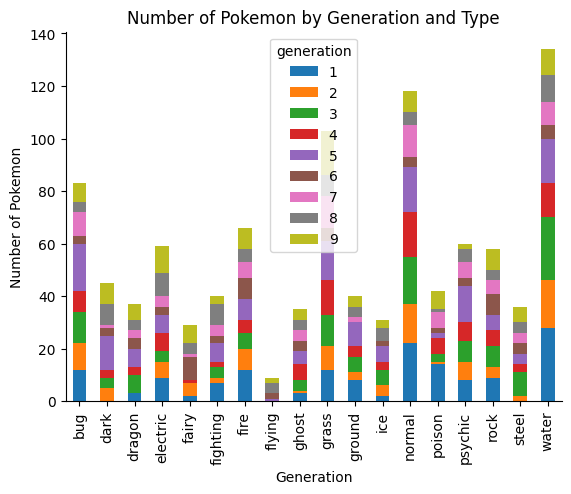

In [76]:
#create a stacked bar chart of the number of pokemon by generation and type
#group the data by generation and type
type_generation_counts = Pokemon_df.groupby(['type_one', 'generation']).size()
#unstack the data
type_generation_counts = type_generation_counts.unstack()
#plot the data
type_generation_counts.plot(kind='bar', stacked=True)
plt.title('Number of Pokemon by Generation and Type')
plt.xlabel('Generation')
plt.ylabel('Number of Pokemon')
#remove the box around the plot
sns.despine()
plt.show()


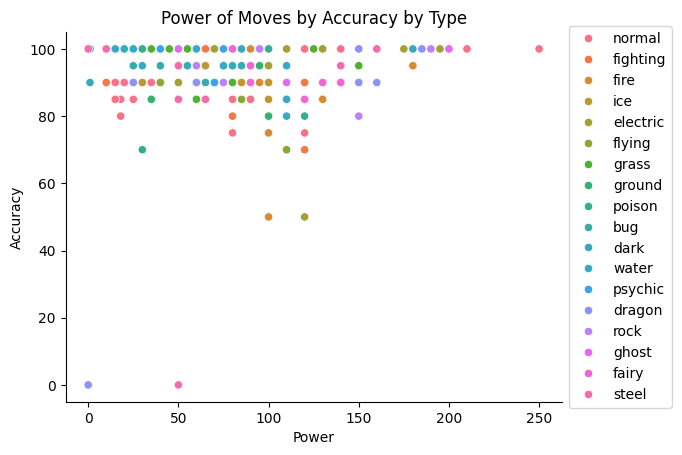

In [77]:
#create a scatter plot of the power of moves by accuracy hue by type
sns.scatterplot(x='power', y='accuracy', data=Moves_df, hue='type')
plt.title('Power of Moves by Accuracy by Type')
plt.xlabel('Power')
plt.ylabel('Accuracy')
#move the legend outside of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#remove the box around the plot
sns.despine()
plt.show()





In [78]:
#show the columns of the moves dataframe
Moves_df.columns

Index(['name', 'damage_class', 'type', 'power', 'accuracy', 'pp', 'priority',
       'target', 'effect', 'effect_chance', 'pokemon', 'pokemon_count',
       'generation', 'meta', 'machines_count', 'machines'],
      dtype='object')

In [79]:
#NaN values in power column
Moves_df[~Moves_df['power'].notnull()]

,name,damage_class,type,power,accuracy,pp,priority,target,effect,effect_chance,pokemon,pokemon_count,generation,meta,machines_count,machines
11,guillotine,physical,normal,NaN,30.0,5,0,selected-pokemon,Inflicts damage equal to the target's max HP. ...,NaN,"krabby, kingler, pinsir, gligar, corphish, cra...",19,1,ohko,0,NaN
13,swords-dance,status,normal,NaN,100.0,20,0,user,Raises the user's Attack by two stages.,NaN,"bulbasaur, ivysaur, venusaur, charmander, char...",349,1,net-good-stats,13,"red-blue, yellow, diamond-pearl, platinum, hea..."
17,whirlwind,status,normal,NaN,100.0,20,-6,selected-pokemon,Switches the target out for another of its tra...,NaN,"butterfree, pidgey, pidgeotto, pidgeot, spearo...",62,1,force-switch,1,"red-blue, yellow"
27,sand-attack,status,ground,NaN,100.0,15,0,selected-pokemon,Lowers the target's accuracy by one stage.,NaN,"pidgey, pidgeotto, pidgeot, sandshrew, sandsla...",120,1,net-good-stats,0,NaN
31,horn-drill,physical,normal,NaN,30.0,5,0,selected-pokemon,Inflicts damage equal to the target's max HP. ...,NaN,"nidorina, nidoqueen, nidoran-m, nidorino, nido...",24,1,ohko,1,"red-blue, yellow"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,life-dew,status,water,NaN,100.0,10,0,user-and-allies,NaN,NaN,"squirtle, wartortle, blastoise, clefairy, clef...",39,8,heal,0,NaN
791,obstruct,status,dark,NaN,100.0,10,4,user,NaN,NaN,obstagoon,1,8,unique,0,NaN
809,corrosive-gas,status,poison,NaN,100.0,40,0,all-other-pokemon,Inflicts regular damage.,NaN,"vileplume, tentacruel, gastly, haunter, gengar...",17,8,unique,0,NaN
810,coaching,status,fighting,NaN,100.0,10,0,user-and-allies,Inflicts regular damage.,100.0,"poliwrath, machop, machoke, machamp, hitmonlee...",74,8,net-good-stats,1,"scarlet-violet, the-indigo-disk"


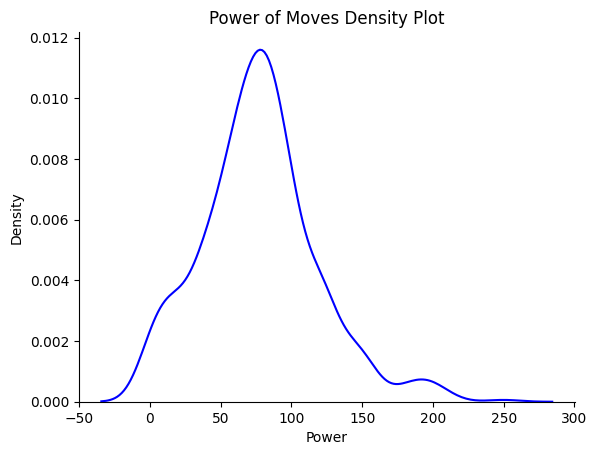

In [80]:
#create a density plot of the power of moves
sns.kdeplot(data=Moves_df['power'], color='blue')
plt.title('Power of Moves Density Plot')
plt.xlabel('Power')
plt.ylabel('Density')
#remove the box around the plot
sns.despine()
plt.show()


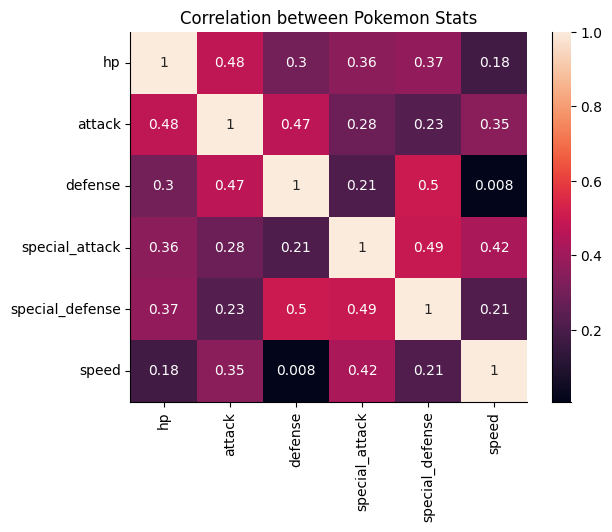

In [90]:
#create a heatmap of the correlation between the HP, Attack, Defense, Special Attack, Special Defense, and Speed of pokemon
#select the columns of the pokemon dataframe that we want to use
pokemon_stats = Pokemon_df[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']]
#create the correlation matrix
pokemon_stats_corr = pokemon_stats.corr()
#plot the heatmap
sns.heatmap(pokemon_stats_corr, annot=True)
plt.title('Correlation between Pokemon Stats')
#remove the box around the plot
sns.despine()
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Pokemon_Stats_Correlation.png', bbox_inches='tight')
plt.show()



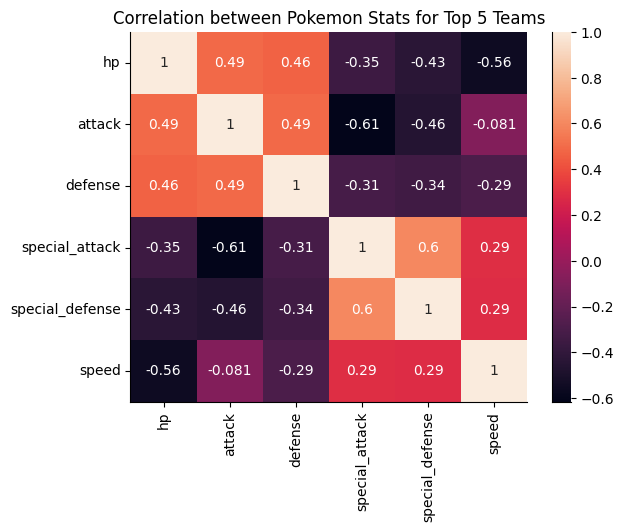

In [91]:
#create a heatmap of the correlation between the HP, Attack, Defense, Special Attack, Special Defense, and Speed of pokemon
#select the columns of the pokemon dataframe that we want to use
pokemon_stats = Top5_df[['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']]
#create the correlation matrix
pokemon_stats_corr = pokemon_stats.corr()
#plot the heatmap
sns.heatmap(pokemon_stats_corr, annot=True)
plt.title('Correlation between Pokemon Stats for Top 5 Teams')
#remove the box around the plot
sns.despine()
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Top_5_Teams_Pokemon_Stats_Correlation.png', bbox_inches='tight')
plt.show()

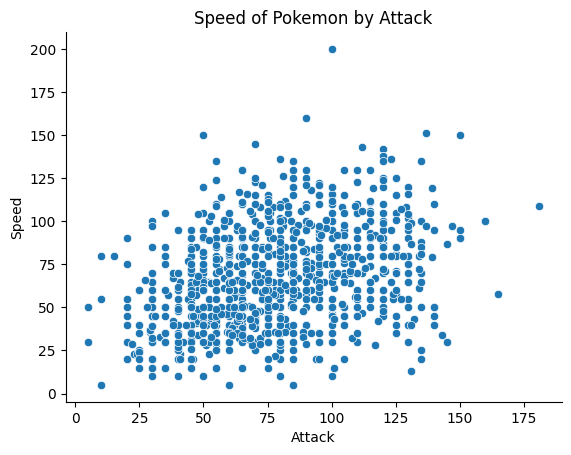

In [82]:
# create a scatter plot of the speed of pokemon by the attack of pokemon and add labels to the pokemon with the most speed and attack
#plot the scatter plot
sns.scatterplot(x='attack', y='speed', data=Pokemon_df)
plt.title('Speed of Pokemon by Attack')
plt.xlabel('Attack')
plt.ylabel('Speed')

#remove the box around the plot
sns.despine()
plt.show()



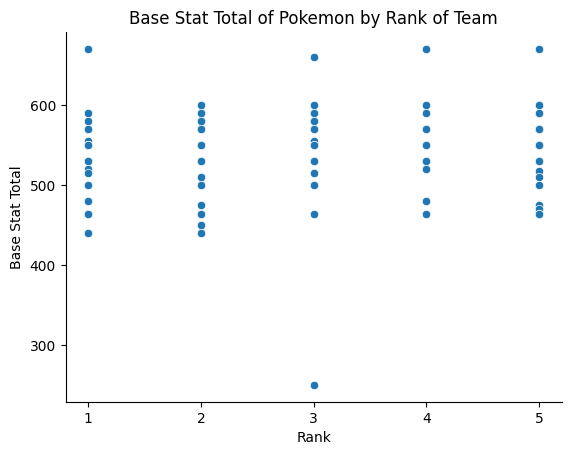

In [83]:
#Fromt the top 5 teams, create a scatter plot of the base stat total of the pokemon by the rank of the team
#plot the scatter plot
sns.scatterplot(x='rank', y='stat_total', data=Top5_df)
plt.title('Base Stat Total of Pokemon by Rank of Team')
plt.xlabel('Rank')
plt.ylabel('Base Stat Total')
#remove the box around the plot
sns.despine()
#remove the .5 from the x axis
plt.xticks(np.arange(1, 6, 1))
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Base_Stat_Total_of_Pokemon_by_Rank_of_Team.png')
plt.show()


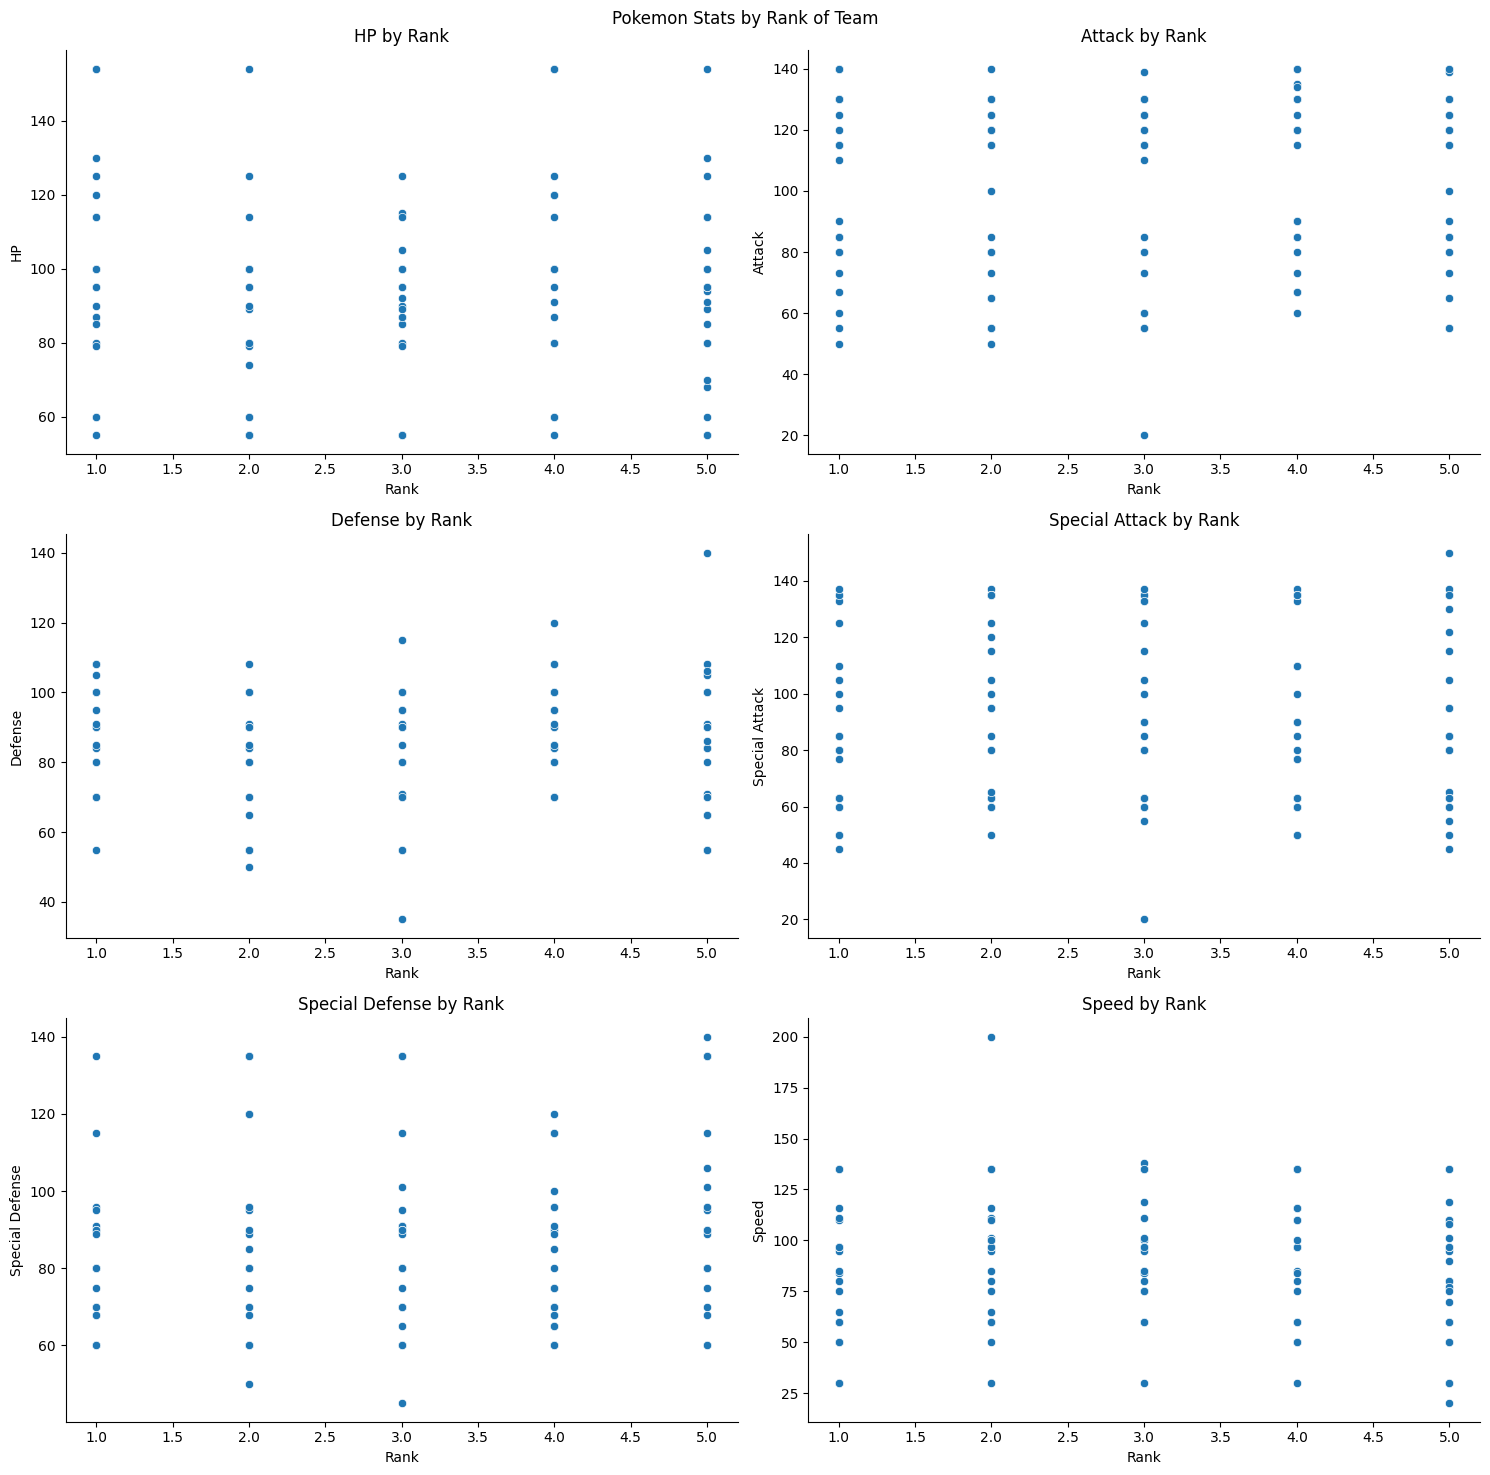

In [84]:
#create 6 scatter plots of the hp, attack, defense, special attack, special defense, and speed of pokemon by the rank of the team they are on
#plot the scatter plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Pokemon Stats by Rank of Team')
sns.scatterplot(x='rank', y='hp', data=Top5_df, ax=axs[0, 0])
axs[0, 0].set_title('HP by Rank')
axs[0, 0].set(xlabel='Rank', ylabel='HP')
#remove the box around the plot
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)
sns.scatterplot(x='rank', y='attack', data=Top5_df, ax=axs[0, 1])
axs[0, 1].set_title('Attack by Rank')
axs[0, 1].set(xlabel='Rank', ylabel='Attack')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)
sns.scatterplot(x='rank', y='defense', data=Top5_df, ax=axs[1, 0])
axs[1, 0].set_title('Defense by Rank')
axs[1, 0].set(xlabel='Rank', ylabel='Defense')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)
sns.scatterplot(x='rank', y='special_attack', data=Top5_df, ax=axs[1, 1])
axs[1, 1].set_title('Special Attack by Rank')
axs[1, 1].set(xlabel='Rank', ylabel='Special Attack')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)
sns.scatterplot(x='rank', y='special_defense', data=Top5_df, ax=axs[2, 0])
axs[2, 0].set_title('Special Defense by Rank')
axs[2, 0].set(xlabel='Rank', ylabel='Special Defense')
axs[2, 0].spines['top'].set_visible(False)
axs[2, 0].spines['right'].set_visible(False)
sns.scatterplot(x='rank', y='speed', data=Top5_df, ax=axs[2, 1])
axs[2, 1].set_title('Speed by Rank')
axs[2, 1].set(xlabel='Rank', ylabel='Speed')
axs[2, 1].spines['top'].set_visible(False)
axs[2, 1].spines['right'].set_visible(False)
plt.tight_layout()
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Pokemon_Stats_by_Rank_of_Team.png', bbox_inches='tight')
plt.show()



In [85]:
#sort Top_5_df by stat_total lowest to highest
Top5_df = Top5_df.sort_values(by='stat_total')
Top5_df

,pokemon,item,ability,tera type,move_1,move_2,move_3,move_4,rank,wins,...,move_3_power,move_3_effect,move_3_effect_chance,move_3_accuracy,move_3_generation,move_4_power,move_4_effect,move_4_effect_chance,move_4_accuracy,move_4_generation
2952,smeargle,focus sash,moody,ghost,spore,follow-me,wide-guard,spiky-shield,3,13,...,NaN,Moves with multiple targets will not hit frien...,NaN,100.0,5.0,NaN,Blocks damaging attacks and damages attacking ...,NaN,100.0,6.0
2944,pelipper,focus sash,drizzle,ghost,protect,weather-ball,hurricane,wide-guard,1,12,...,110.0,Inflicts regular damage. Has a 30% chance to ...,30.0,70.0,5.0,NaN,Moves with multiple targets will not hit frien...,NaN,100.0,5.0
9,pelipper,life orb,drizzle,grass,weather-ball,hurricane,helping-hand,wide-guard,2,9,...,NaN,Boosts the power of the target's moves by 50% ...,NaN,100.0,3.0,NaN,Moves with multiple targets will not hit frien...,NaN,100.0,5.0
2949,terapagos,choice specs,tera shift,stellar,tera-starstorm,dark-pulse,tri-attack,earth-power,2,12,...,80.0,Inflicts regular damage. Has a 20% chance to ...,20.0,100.0,1.0,90.0,Inflicts regular damage. Has a 10% chance to ...,10.0,100.0,4.0
636,amoonguss,sitrus berry,regenerator,water,protect,rage-powder,spore,pollen-puff,1,12,...,NaN,Puts the target to sleep.,NaN,100.0,1.0,90.0,"If the target is an opponent, inflicts regular...",NaN,100.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,zamazenta,rusted shield,dauntless shield,dragon,body-press,heavy-slam,wide-guard,protect,3,9,...,NaN,Moves with multiple targets will not hit frien...,NaN,100.0,5.0,NaN,No moves will hit the user for the remainder o...,NaN,100.0,2.0
18,miraidon,choice specs,hadron engine,fairy,electro-drift,draco-meteor,dazzling-gleam,volt-switch,4,9,...,80.0,Inflicts regular damage.,NaN,100.0,6.0,70.0,"Inflicts regular damage, then the user immedia...",NaN,100.0,5.0
2959,miraidon,choice specs,hadron engine,electric,electro-drift,volt-switch,draco-meteor,discharge,4,12,...,130.0,"Inflicts regular damage, then lowers the user'...",100.0,90.0,4.0,80.0,Inflicts regular damage. Has a 30% chance to ...,30.0,100.0,4.0
2966,kyogre,assault vest,drizzle,grass,water-spout,origin-pulse,thunder,ice-beam,5,13,...,110.0,Inflicts regular damage. Has a 30% chance to ...,30.0,70.0,1.0,90.0,Inflicts regular damage. Has a 10% chance to ...,10.0,100.0,1.0


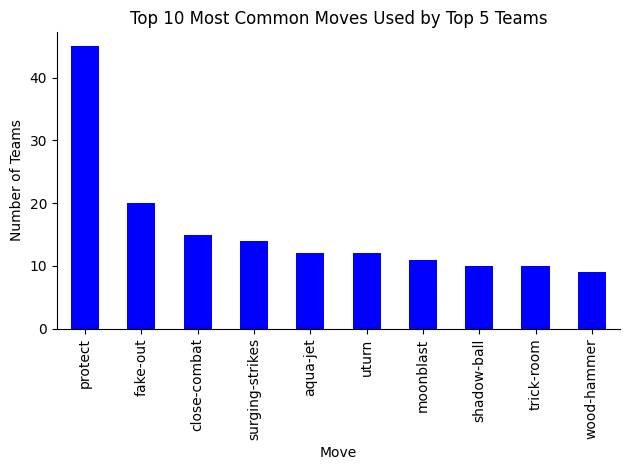

In [92]:
#get the count of the most common moves used by the top 5 teams
move_1_counts = Top5_df['move_1'].value_counts()
move_2_counts = Top5_df['move_2'].value_counts()
move_3_counts = Top5_df['move_3'].value_counts()
move_4_counts = Top5_df['move_4'].value_counts()

#combine the counts of the moves
move_counts = move_1_counts.add(move_2_counts, fill_value=0)
move_counts = move_counts.add(move_3_counts, fill_value=0)
move_counts = move_counts.add(move_4_counts, fill_value=0)
move_counts = move_counts.sort_values(ascending=False)

#plot the top 10 most common moves used by the top 5 teams
move_counts.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Most Common Moves Used by Top 5 Teams')
plt.xlabel('Move')
plt.ylabel('Number of Teams')
#remove the box around the plot
sns.despine()
#tighten the layout of the plot
plt.tight_layout()
#save the plot as a png file
plt.savefig('C:/Users/ryhen/OneDrive - UCB-O365/Machine Learning/Project/Part 1/Pokemon/Visualizations/Top_10_Most_Common_Moves.png', bbox_inches='tight')
plt.show()


In [87]:
move_counts

protect            45.0
fake-out           20.0
close-combat       15.0
surging-strikes    14.0
aqua-jet           12.0
                   ... 
iron-head           1.0
stone-edge          1.0
imprison            1.0
ice-spinner         1.0
origin-pulse        1.0
Name: count, Length: 116, dtype: float64